## The Sparks Foundation

# Task - 1

# PREDICTION USING SUPERVISED ML ( LEVEL- BEGINNER)
# BY

# Name - ANKITA DAS
# Email - ankitadasbelur@gmail.com
# Data Science & Business Analytics Internship

# **Objective**

Predict the percentage of students based on no.of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

About Dataset

The given dataset has two columns, one contains no. of study hours and the other one contains the marks scored by the student. The dataset is http://bit.ly/w-data



## **Linear Regression using Python and library used is Scikit Learn**
So i have used the fundamental python library for implementation of ML alogirthm which is Scikit Learn in short sklearn. We will start with simple linear regression model(SLRM) involving two variables. Then later we will progress to multiple linear regression model(MLRM).

### **Simple Linear Regression Model(SLRM)**
Here we are trying to predict the percentage of marks that a student is expected to score based upon the number of hours studied. It can be solved using simple linear regression involving two variables which is hours and score.

In [30]:
import pandas as pd #pandas is used for data manipulation and data handling
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

## Importing the Data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Dataset inported successfully')

Dataset inported successfully


In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
#reading first five students hours and scores from dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#reading last five students hours and scores from dataset 
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Lets first analyse the data

In [23]:
data.shape

(25, 2)

In [24]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### From the above descriptive analysis we came to know that there is no null value and no extreme values so no need to remove any outliers and missing value imputation/treatment.

## Visualizing the dataset

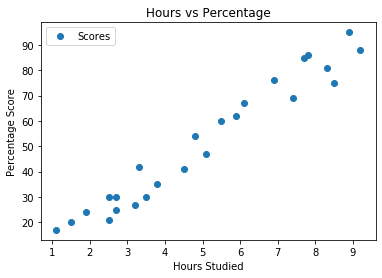

In [6]:
#plotting the dataset
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph, we can see that there is a positive relation between the number of hour studied and percentage of score by the student.

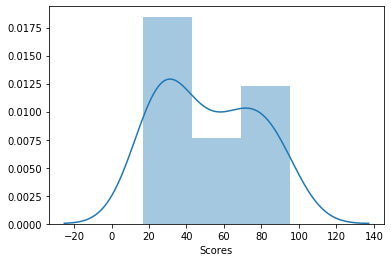

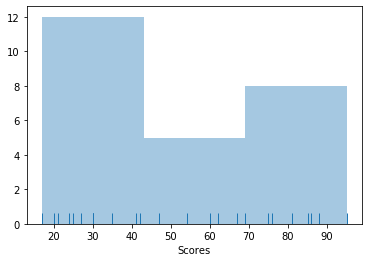

In [31]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()

D:\New folder\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


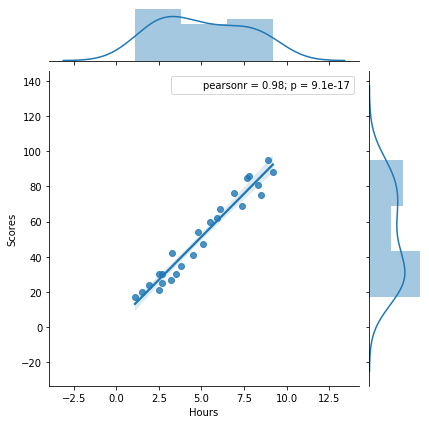

In [32]:
sns.jointplot(data['Hours'], data['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

## Visualizing the correlation between the feature variable and target variable that is hours studied and the percebtage of scores

Text(0.5, 1.0, 'Plotting the regression line')

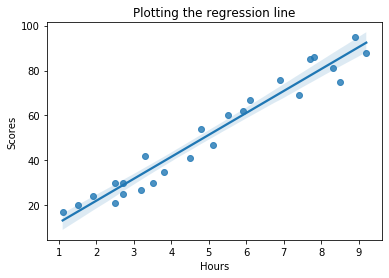

In [33]:
sns.regplot(x="Hours", y="Scores", data=data)
plt.title("Plotting the regression line")


#### From the above correlation plot we came to the conclusion that scores and hours are strongly correlated .

In [7]:
x=data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y=data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

x----->independent

y---->dependent

splitting the data into training and testing examples/instances

x---->x_train,x_test

y----->y_train,y_test

training_data--->x_train & y_train

testing_data--->x_test

splitting the data into train and test sets using train_test_split() method of Scikit-Learn library


In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

we have chosen 20% of the data for testing purpose and remaining 80% for training purpose

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


# Plotting the regression line

In [12]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data


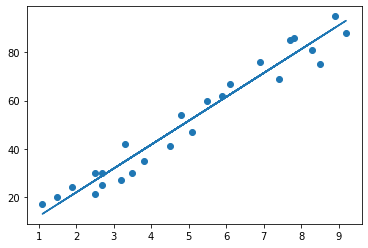

In [13]:
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Testing data - In Hours

In [14]:
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Predicting the scores

In [17]:
y_pred = regressor.predict(X_test)

# Comparing Actual values vs Predicted values

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


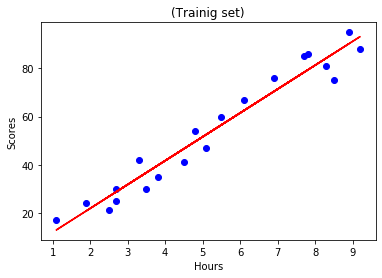

In [36]:
# PLotting the training set
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##  Calculating the coeffeciants of the simple linear regression equation: y = Bo + B1.x (B1: Is the Slope, Bo: Is the  Intercept) which is equivalent/congruent to straight line equation y=mx+c

In [37]:
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [38]:
B0 = mean_y - B1*mean_x

In [39]:
data['predicted_Scores'] = B0 + B1*data['Hours']

In [40]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

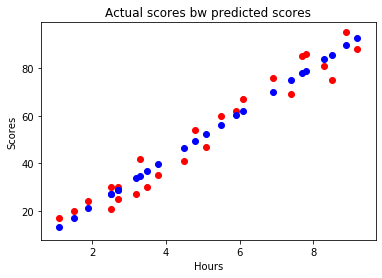

In [41]:
plt.scatter(data['Hours'], data['Scores'], c='red', label='Aactual Marks')
plt.scatter(data['Hours'], data['predicted_Scores'], c='blue', label='Predected Marks')
plt.title('Actual scores bw predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

# What will be predicted score if a student studies for 9.25 hours/day?

In [19]:
hours=9.25
pred = regressor.predict([[hours]])
print ("No. of Hours:{}".format(hours))
print ("Predicted score:{}".format(pred[0]))

No. of Hours:9.25
Predicted score:93.69173248737538


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [43]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
